In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import numpy as np
import random
import string
import tensorflow as tf
from tensorflow.python.ops.rnn_cell import _linear
import zipfile
from six.moves import range
from six.moves.urllib.request import urlretrieve
import collections
import matplotlib.pyplot as plt
import codecs
import time
import os
import gc
from six.moves import cPickle as pickle

from plot_module import text_plot
from plot_module import structure_vocabulary_plots
from plot_module import ComparePlots

from model_module import maybe_download
from model_module import read_data
from model_module import check_not_one_byte
from model_module import id2char
from model_module import char2id
from model_module import BatchGenerator
from model_module import characters
from model_module import batches2string
from model_module import logprob
from model_module import sample_distribution
from model_module import MODEL

In [2]:
if not os.path.exists('enwik8_filtered'):
    if not os.path.exists('enwik8'):
        filename = maybe_download('enwik8.zip', 36445475)
    full_text = read_data(filename)
    new_text = u""
    new_text_list = list()
    for i in range(len(full_text)):
        if (i+1) % 10000000 == 0:
            print("%s characters are filtered" % i)
        if ord(full_text[i]) < 256:
            new_text_list.append(full_text[i])
    text = new_text.join(new_text_list)
    del new_text_list
    del new_text
    del full_text

    (not_one_byte_counter, min_character_order_index, max_character_order_index, number_of_characters, present_characters_indices) = check_not_one_byte(text)

    print("number of not one byte characters: ", not_one_byte_counter) 
    print("min order index: ", min_character_order_index)
    print("max order index: ", max_character_order_index)
    print("total number of characters: ", number_of_characters)
    
    f = open('enwik8_filtered', 'w')
    f.write(text.encode('utf8'))
    f.close()
    
else:
    f = open('enwik8_filtered', 'r')
    text = f.read().decode('utf8')
    f.close() 
    (not_one_byte_counter, min_character_order_index, max_character_order_index, number_of_characters, present_characters_indices) = check_not_one_byte(text)

    print("number of not one byte characters: ", not_one_byte_counter) 
    print("min order index: ", min_character_order_index)
    print("max order index: ", max_character_order_index)
    print("total number of characters: ", number_of_characters)    

number of not one byte characters:  0
min order index:  9
max order index:  255
total number of characters:  196


In [4]:
#different
offset = 20000
valid_size = 75000
valid_text = text[offset:offset+valid_size]
train_text = text[offset+valid_size:]
train_size = len(train_text)
print(train_size, train_text[:64])
print(valid_size, valid_text[:64])

99285000 in, some believe that it is only a matter of when an environment
75000 ture in Mutual Aid: A Factor of Evolution (1897). Subsequent ana


In [5]:
vocabulary_size = number_of_characters
vocabulary = list()
characters_positions_in_vocabulary = list()

character_position_in_vocabulary = 0
for i in range(256):
    if present_characters_indices[i]:
        vocabulary.append(unichr(i))
        characters_positions_in_vocabulary.append(character_position_in_vocabulary)
        character_position_in_vocabulary += 1
    else:
        characters_positions_in_vocabulary.append(-1)


string_vocabulary = u""
for i in range(vocabulary_size):
    string_vocabulary += vocabulary[i]
print("Vocabulary: ", string_vocabulary)
print("char2id(u'a') = %s,  char2id(u'z') = %s,  char2id(u' ') = %s" % (char2id(u'a', characters_positions_in_vocabulary),
                                                                        char2id(u'z', characters_positions_in_vocabulary),
                                                                        char2id(u' ', characters_positions_in_vocabulary)))
print("id2char(78) = %s,  id2char(156) = %s,  id2char(140) = %s" % (id2char(78,
                                                                            vocabulary),
                                                                    id2char(156,
                                                                            vocabulary),
                                                                    id2char(140,
                                                                            vocabulary)))


Vocabulary:  	
 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~ ¡¢£¤¥¦§¨©ª«¬­®¯°±²³´µ¶·¸¹º»¼½¾¿ÀÁÂÃÄÅÆÇÈÉÊËÌÍÎÏÐÑÒÓÔÕÖ×ØÙÚÛÜÝÞßàáâãäåæçèéêëìíîïðñòóôõö÷øùúûüýþÿ
char2id(u'a') = 67,  char2id(u'z') = 92,  char2id(u' ') = 2
id2char(78) = l,  id2char(156) = Ø,  id2char(140) = È


In [6]:
batch_size_test=64
num_unrollings_test=10

train_batches_test = BatchGenerator(train_text,
                                    batch_size_test,
                                    vocabulary_size,
                                    characters_positions_in_vocabulary,
                                    num_unrollings_test)
valid_batches_test = BatchGenerator(valid_text,
                                    1,
                                    vocabulary_size,
                                    characters_positions_in_vocabulary,
                                    1)

print(batches2string(train_batches_test.next(), vocabulary))
print(batches2string(train_batches_test.next(), vocabulary))
print(batches2string(valid_batches_test.next(), vocabulary))
print(batches2string(valid_batches_test.next(), vocabulary))

[u'in, some be', u'd, after su', u'uchan also ', u'bankruptcy ', u'\n[[pl:Wglow', u' CQ 42, (19', u'[Sahara]] i', u'licensed to', u'actor\n*[[19', u'  <page>\n  ', u' the differ', u'nt, althoug', u'ision>\n  </', u".\n*'''Write", u'itative sou', u'uth was one', u' verdict wa', u'called &quo', u'(Kilmer rep', u'y the time ', u' book\n | au', u' [[Rio Grou', u'=Some famou', u"ics' was co", u'==Recurring', u'olor blue o', u']], the Cha', u'{{main|Brit', u'tem and its', u' can be gen', u's and respo', u"ula's locat", u' to each ot', u'cremental Z', u'in an XML-e', u'\n        <i', u'on]] ==\n*[[', u'Vernon also', u'ed by all t', u'ly isolated', u"''\n\n[[Perfo", u'o compute x', u'eneral conc', u'on in Brita', u'nd commenta', u'ven though ', u'onatas]]\n[[', u' publisher ', u']}}. {{IPA|', u'[Nazi]] occ', u's particles', u'datum, the ', u' and decide', u'kage is sup', u'and other f', u'th I of Eng', u't economic ', u'Minister. T', u'ns. Ironica', u'Automated c', u've mild win', u'ties withi

In [7]:

class two_gates(MODEL):
    def layer(self, inp, state):
        X = tf.concat(1, [inp,
                            state[0],
                            state[1]])
        RES = tf.matmul(X, self.Matrix) + self.Bias
        state = tf.tanh(RES)
        return state

    
    def iteration(self, inp, state):
        output = self.layer(inp, state)
        input_gate = tf.sigmoid(tf.matmul(tf.concat(1, [inp, output, state[1]]), self.input_matrix) + self.input_bias)
        input_gate = tf.reshape(input_gate, [-1])
        forget_gate = tf.sigmoid(tf.matmul(tf.concat(1, [inp, output, state[1]]), self.forget_matrix) + self.forget_bias)
        forget_gate = tf.reshape(forget_gate, [-1])
        memory = tf.transpose(tf.transpose(output) * input_gate) + tf.transpose(tf.transpose(state[1]) * forget_gate)
        return output, [output, memory], input_gate, forget_gate
    
    def __init__(self,
                 batch_size,
                 vocabulary,
                 characters_positions_in_vocabulary,
                 num_unrollings,
                 num_layers,
                 num_nodes,
                 init_bias,
                 train_text,
                 valid_text,
                 seed=None,
                 mean=0.,
                 stddev='default',
                 shift=0.,
                 init_learning_rate=1.):
        self._results = list()
        self._batch_size = batch_size
        self._vocabulary = vocabulary
        self._vocabulary_size = len(vocabulary)
        self._characters_positions_in_vocabulary = characters_positions_in_vocabulary
        self._num_unrollings = num_unrollings
        self._num_layers = num_layers
        self._num_nodes = num_nodes
        self._init_bias = init_bias
        self._train_text = train_text
        self._valid_text = valid_text
        self._valid_size = len(valid_text)
        
        self._mean = mean
        
        self._stddev = list()
        if stddev == 'default':
            self._stddev = 2.0 * np.sqrt(1./(2*num_nodes[0] + vocabulary_size))
        else:
            self._stddev = stddev 
        self._shift = shift
        self._init_learning_rate = init_learning_rate
        
        self._indices = {"batch_size": 0,
                         "num_unrollings": 1,
                         "num_layers": 2,
                         "num_nodes": 3,
                         "half_life": 4,
                         "decay": 5,
                         "num_steps": 6,
                         "averaging_number": 7,
                         "init_bias": 8,
                         "init_mean": 9,
                         "init_stddev": 10,
                         "init_shift": 11,
                         "init_learning_rate": 12,
                         "type": 13}
        self._graph = tf.Graph()
        
        self._last_num_steps = 0
        with self._graph.as_default(): 
            with self._graph.device('/gpu:0'): 
                if seed is not None:
                    tf.set_random_seed(random.randint(-2*10**9, 2*10**9))
                self.Matrix = tf.Variable(tf.truncated_normal([self._vocabulary_size + 2*self._num_nodes[0],
                                                               self._num_nodes[0]],
                                                              mean=self._mean,
                                                              stddev=self._stddev))
                self.Bias = tf.Variable([self._shift for _ in range(self._num_nodes[0])])
                
                self.input_matrix = tf.Variable(tf.truncated_normal([self._vocabulary_size + 2 * self._num_nodes[0], 1], stddev = self._stddev))
                self.input_bias = tf.Variable([self._init_bias])
                
                self.forget_matrix = tf.Variable(tf.truncated_normal([self._vocabulary_size + 2 * self._num_nodes[0], 1], stddev = self._stddev))
                self.forget_bias = tf.Variable([self._init_bias])
                # classifier 
                self.weights = tf.Variable(tf.truncated_normal([self._num_nodes[-1], self._vocabulary_size], stddev = 0.1))
                self.bias = tf.Variable(tf.zeros([self._vocabulary_size]))

                
                """PLACEHOLDERS train data"""
                self._train_data = list()
                for i in range(self._num_unrollings + 1):
                    self._train_data.append(
                        tf.placeholder(tf.float32, shape=[self._batch_size, self._vocabulary_size], name=('inp_%s'%i)))
                train_inputs = self._train_data[: self._num_unrollings]
                train_labels = self._train_data[1:]  # labels are inputs shifted by one time step.
                # Unrolled LSTM loop.

                self.saved_state = [tf.Variable(tf.zeros([self._batch_size, self._num_nodes[0]]), trainable=False),
                                    tf.Variable(tf.zeros([self._batch_size, self._num_nodes[0]]), trainable=False)]
                
                """global step"""
                self._global_step = tf.Variable(0)
  

                outputs = list()
                state = self.saved_state
                for inp in train_inputs:
                    output, state, _, _ = self.iteration(inp, state)
                    outputs.append(output)

                save_list = list()
                save_list.append(self.saved_state[0].assign(state[0]))
                save_list.append(self.saved_state[1].assign(state[1]))
                
                """skip operation"""
                self._skip_operation = tf.group(*save_list)

                with tf.control_dependencies(save_list):
                        # Classifier.
                    logits = tf.nn.xw_plus_b(tf.concat(0, outputs), self.weights, self.bias)
                    """loss"""
                    self._loss = tf.reduce_mean(
                        tf.nn.softmax_cross_entropy_with_logits(
                            logits, tf.concat(0, train_labels)))
                # Optimizer.
                
                """PLACEHOLDERS half life and decay"""
                self._half_life = tf.placeholder(tf.int32, name='half_life')
                self._decay = tf.placeholder(tf.float32, name='decay')
                """learning rate"""
                self._learning_rate = tf.train.exponential_decay(self._init_learning_rate,
                                                                 self._global_step,
                                                                 self._half_life,
                                                                 self._decay,
                                                                 staircase=True)
                optimizer = tf.train.GradientDescentOptimizer(self._learning_rate)
                gradients, v = zip(*optimizer.compute_gradients(self._loss))
                gradients, _ = tf.clip_by_global_norm(gradients, 1.25)
                """optimizer"""
                self._optimizer = optimizer.apply_gradients(zip(gradients, v), global_step=self._global_step)
                """train prediction"""
                self._train_prediction = tf.nn.softmax(logits)

                # Sampling and validation eval: batch 1, no unrolling.
                self.saved_sample_state = list()
                self.saved_sample_state.append(tf.Variable(tf.zeros([1, self._num_nodes[0]]), trainable=False)) 
                self.saved_sample_state.append(tf.Variable(tf.zeros([1, self._num_nodes[0]]), trainable=False)) 
                """PLACEHOLDER sample input"""
                self._sample_input = tf.placeholder(tf.float32, shape=[1, self._vocabulary_size], name='sample_input')
                
                reset_list = list()
                reset_list.append(self.saved_sample_state[0].assign(tf.zeros([1, self._num_nodes[0]])))
                reset_list.append(self.saved_sample_state[1].assign(tf.zeros([1, self._num_nodes[0]])))

                """reset sample state"""
                self._reset_sample_state = tf.group(*reset_list)

                
                sample_output, sample_state, self.input_gate, self.forget_gate = self.iteration(self._sample_input, self.saved_sample_state)


                sample_save_list = list()
                sample_save_list.append(self.saved_sample_state[0].assign(sample_state[0]))
                sample_save_list.append(self.saved_sample_state[1].assign(sample_state[1]))

                with tf.control_dependencies(sample_save_list):
                    """sample prediction"""
                    self._sample_prediction = tf.nn.softmax(tf.nn.xw_plus_b(sample_output, self.weights, self.bias)) 
                
                
                """saver"""
                self.saver = tf.train.Saver(max_to_keep=None)
                            
                        
    
    def _generate_metadata(self, half_life, decay, num_averaging_iterations):
        metadata = list()
        metadata.append(self._batch_size)
        metadata.append(self._num_unrollings)
        metadata.append(self._num_layers)
        metadata.append(self._num_nodes)
        metadata.append(half_life)
        metadata.append(decay)
        metadata.append(self._last_num_steps)
        metadata.append(num_averaging_iterations)
        metadata.append(self._init_bias)
        metadata.append(self._mean)
        metadata.append(self._stddev)
        metadata.append(self._shift)
        metadata.append(self._init_learning_rate)
        metadata.append('two_gates')
        return metadata
    
        
    def get_gates(self, session, num_strings=10, length=75, start_positions=None):
        self._reset_sample_state.run()
        self._valid_batches = BatchGenerator(self._valid_text,
                                             1,
                                             self._vocabulary_size,
                                             self._characters_positions_in_vocabulary,
                                             1)
        if start_positions is None:
            start_positions = list()
            if self._valid_size / num_strings < length:
                num_strings = self._valid_size / length
            for i in range(num_strings):
                start_positions.append(i* (self._valid_size / num_strings) + self._valid_size / num_strings / 2)
            while self._valid_size - start_positions[-1] < length:
                del start_positions[-1]
        text_list = list()
        gate_list = [list(), list()]
        collect_gates = False
        letters_parsed = -1
        for idx in range(self._valid_size):
            b = self._valid_batches.next()
            
            if idx in start_positions or collect_gates: 
                if letters_parsed == -1:
                    letters_parsed = 0
                    text = u""
                    i_list = list()
                    f_list = list()
                    collect_gates = True
                text += characters(b[0], self._vocabulary)[0]
                i_list.append(self.input_gate.eval({self._sample_input: b[0]})[0])
                f_list.append(self.forget_gate.eval({self._sample_input: b[0]})[0])
                letters_parsed += 1
                if letters_parsed >= length:
                    collect_gates = False
                    gate_list[0].append(i_list)
                    gate_list[1].append(f_list)
                    text_list.append(text)
                    letters_parsed = -1
                    
            _ = self._sample_prediction.eval({self._sample_input: b[0]})
        return (text_list, gate_list)   
           

In [38]:
iter_num = 10
results_GL = list()   
for i in range(iter_num):
    model = two_gates(64,
                             vocabulary,
                             characters_positions_in_vocabulary,
                             10,
                             1,
                             [32],
                             -1.,
                             train_text,
                             valid_text)
    model.simple_run(200,
                         'two_gates/variables/check#%s' % i,
                            10000,
                               4000,
                               5000,        #learning has a chance to be stopped after every block of steps
                               20,
                               0.9,
                               3,
                    fixed_num_steps=True)
    results_GL.extend(model._results)
    model.destroy()
    del model
    gc.collect()

Number of steps = 10000     Percentage = 38.68%     Time = 151s     Learning rate = 0.1216
Number of steps = 10000     Percentage = 38.85%     Time = 150s     Learning rate = 0.1216
Number of steps = 10000     Percentage = 38.23%     Time = 147s     Learning rate = 0.1216
Number of steps = 10000     Percentage = 38.69%     Time = 150s     Learning rate = 0.1216
Number of steps = 10000     Percentage = 38.15%     Time = 150s     Learning rate = 0.1216
Number of steps = 10000     Percentage = 38.26%     Time = 149s     Learning rate = 0.1216
Number of steps = 10000     Percentage = 39.01%     Time = 151s     Learning rate = 0.1216
Number of steps = 10000     Percentage = 38.70%     Time = 153s     Learning rate = 0.1216
Number of steps = 10000     Percentage = 38.37%     Time = 154s     Learning rate = 0.1216
Number of steps = 10000     Percentage = 38.96%     Time = 153s     Learning rate = 0.1216


In [41]:

model = two_gates(64,
                             vocabulary,
                             characters_positions_in_vocabulary,
                             10,
                             1,
                             [32],
                             -1.,
                             train_text,
                             valid_text)

text_list, gate_list = model.run_for_analitics(model.get_gates,
                                                        'two_gates/variables/check#1',
                                                        [100, 75, None])
structure_vocabulary_plots(text_list,
                            gate_list[0],
                            'gate for letter position',
                            'input gate',
                            ['two_gates', 'test'],
                            'gate_test_structure',
                            ylims = [0., 1.],
                            show=False)
for i in range(99):
    text_plot(text_list[i],
                gate_list[0][i],
                'input_gate',
                'input_gate',
                ['two_gates', 'test', 'text_plots', 'input'],
                '#%s' % i,
                show=False)
structure_vocabulary_plots(text_list,
                            gate_list[1],
                            'gate for letter position',
                            'forget gate',
                            ['two_gates', 'test'],
                            'gate_test_structure',
                            ylims = [0., 1.],
                            show=False)
for i in range(99):
    text_plot(text_list[i],
                gate_list[1][i],
                'forget_gate',
                'forget_gate',
                ['two_gates', 'test', 'text_plots', 'forget'],
                '#%s' % i,
                show=False)

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [7]:
model = two_gates(64,
                             vocabulary,
                             characters_positions_in_vocabulary,
                             10,
                             1,
                             [32],
                             0.,
                             train_text,
                             valid_text)

In [18]:
model_vars = ['self.Matrix',
              'self.Bias',
              'self.input_matrix',
              'self.input_bias',
              'self.forget_matrix',
              'self.forget_bias',
              'self.weights',
              'self.bias']
intermediate_vars = ['self.saved_sample_state[0]',
                     'self.saved_sample_state[1]',
                     'self.input_gate',
                     'self.forget_gate']
insight = model.run_for_analitics(model.get_insight,
                                                        'two_gates/variables/check#1',
                                                        [model_vars, intermediate_vars, 75])

In [19]:
good = insight

In [14]:
bad = insight

In [43]:
def average_all(insight, print_mean=False):
    model_dictionary = dict()
    for key in insight[0].keys():
        model_dictionary[key] = np.mean(insight[0][key])
        if print_mean:
            print('mean %s: %s' % (key, model_dictionary[key]))
    intermediate_dictionary = dict()
    for key in insight[1].keys():
        intermediate_dictionary[key] = list()
        for res in insight[1][key]:
            intermediate_dictionary[key].append(np.mean(res))
        if print_mean:
            print('mean %s:', intermediate_dictionary[key])
    return (model_dictionary, intermediate_dictionary)

def print_average(average_insight):
    print('constant graph nodes:')
    for key in average_insight[0].keys():
        print('mean %s: %s' % (key, average_insight[0][key]))
    print('\nchanging graph nodes:')
    for key in average_insight[1].keys():
        print('mean %s:' % key, average_insight[1][key])
        
def plot_histogram(sequence, bins=30, facecolor=None, edgecolor=None):
    plt.hist(sequence, bins=bins, facecolor=facecolor, edgecolor=edgecolor)
    plt.show()
    
def constant_nodes_histogram(constant_insight, bins=30, facecolor=None, edgecolor=None):
    for key in constant_insight:
        print('%s:' % key)
        plot_histogram(np.reshape(constant_insight[key], -1), bins=bins, facecolor=facecolor, edgecolor=edgecolor)

def compare_hists(good_constant, bad_constant, bins=30):
    for key in good_constant:
        print('%s:' % key)
        ax = plt.subplot(111)
        range1 = [np.amin(good_constant[key]), np.amax(good_constant[key])]
        range2 = [np.amin(bad_constant[key]), np.amax(bad_constant[key])]
        Range = [min(range1[0], range2[0]), max(range1[1], range2[1])]
        ax.hist(np.reshape(good_constant[key], -1), bins=bins, range=Range)
        ax.hist(np.reshape(bad_constant[key], -1), bins=bins, range=Range, facecolor='none', edgecolor='red')
        plt.show()
        
def drift(good_changing, bad_changing):
    for key in good_changing.keys():
        print('%s:' % key)
        num_nodes = good_changing[key][0].shape[len(good_changing[key][0].shape)-1]
        time_data = np.concatenate([[i]*num_nodes for i in range(len(good_changing[key]))])
        good_list = list()
        bad_list = list()
        for good_letter, bad_letter in zip(good_changing[key], bad_changing[key]):
            good_list.append(np.reshape(good_letter, -1))
            bad_list.append(np.reshape(bad_letter, -1))
        good_data = np.concatenate(good_list)
        bad_data = np.concatenate(bad_list)
        ax = plt.subplot(111)
        ax.plot(time_data, good_data, linestyle='None', marker='o', markerfacecolor='b')
        ax.plot(time_data, bad_data, linestyle='None', marker='o', markerfacecolor='r')
        plt.show()


In [20]:
average_good = average_all(good)
average_bad = average_all(bad)
print('good')
print_average(average_good)
print('\nbad')
print_average(average_bad)

good
constant graph nodes:
mean self.bias: 1.94627e-07
mean self.weights: -0.00127141
mean self.Bias: 0.0252375
mean self.input_matrix: 0.0199704
mean self.forget_matrix: -0.00128728
mean self.forget_bias: 0.0536151
mean self.input_bias: 0.0949457
mean self.Matrix: -0.00156254

changing graph nodes:
mean self.input_gate: [0.00096079853, 0.017463172, 0.0051928009, 0.003699675, 0.62470269, 0.01102571, 0.032239936, 0.59195811, 0.095454156, 0.033932131, 0.0028125234, 0.0057140184, 0.039034866, 0.012974227, 0.65534598, 0.080648914, 0.020401424, 0.0068397634, 0.80696756, 0.90948486, 0.12032237, 0.85355127, 0.085735194, 0.13391621, 0.0075566368, 0.0026322925, 0.027216924, 0.016453469, 0.73750031, 0.028830746, 0.011384881, 0.62386149, 0.070694447, 0.064815059, 0.022991199, 0.022782499, 0.013363124, 0.0013141524, 0.012328393, 0.072778292, 0.078761369, 0.69597441, 0.47498816, 0.67284352, 0.74767047, 0.81267077, 0.41257364, 0.14323686, 0.097775578, 0.942761, 0.2220671, 0.02413612, 0.030045474, 0.

self.Bias:


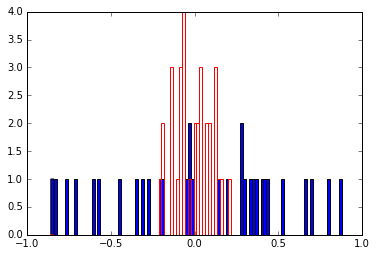

self.weights:


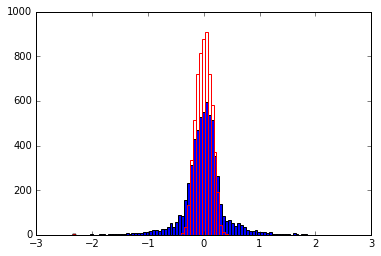

self.input_matrix:


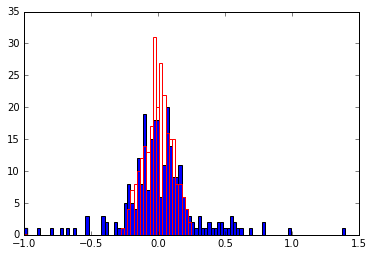

self.forget_matrix:


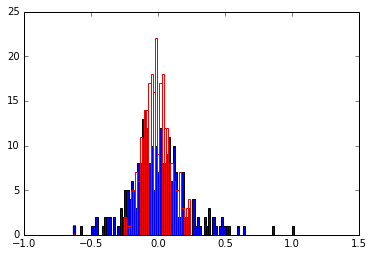

self.bias:


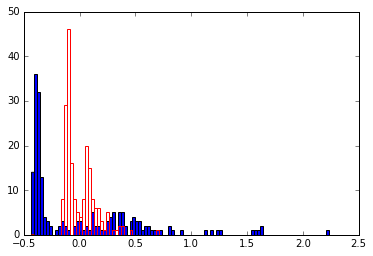

self.forget_bias:


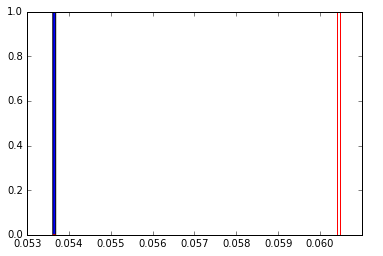

self.input_bias:


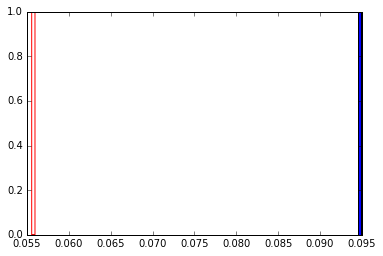

self.Matrix:


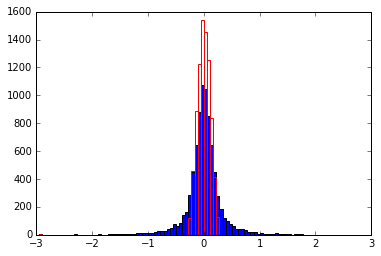

In [29]:
"""print('\ngood')
constant_nodes_histogram(good[0])
print('\nbad')
constant_nodes_histogram(bad[0])"""
compare_hists(good[0], bad[0], bins=100)

self.input_gate:


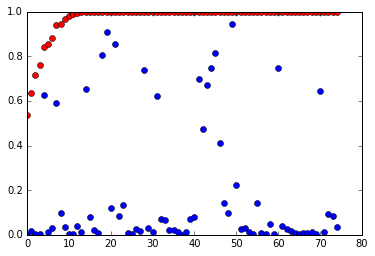

self.forget_gate:


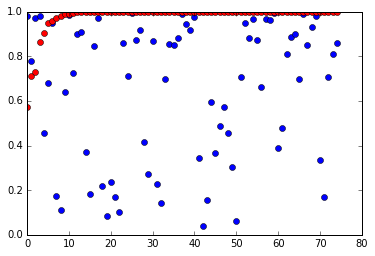

self.saved_sample_state[0]:


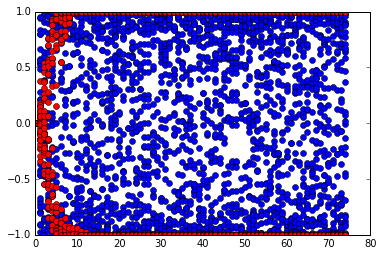

self.saved_sample_state[1]:


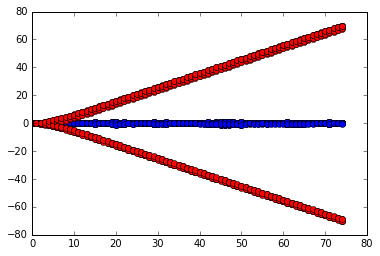

In [37]:
drift(good[1], bad[1])

In [9]:
folder_name = 'two_gates'
file_name = 'check%s_ns10k_dc0.9_hl500.pickle' % iter_num
force = True
pickle_dump = {'results_GL': results_GL}
if not os.path.exists(folder_name):
    try:
        os.makedirs(folder_name)
    except Exception as e:
        print("Unable create folder '%s'" % folder_name, ':', e)    
print('Pickling %s.' % (folder_name + '/' + file_name))
try:
    with open(folder_name + '/' + file_name, 'wb') as f:
        pickle.dump(pickle_dump, f, pickle.HIGHEST_PROTOCOL)
except Exception as e:
    print('Unable to save data to', file_name, ':', e)

Pickling two_gates/check10_ns10k_dc0.9_hl500.pickle.


In [11]:
iter_num = 10
folder_name = 'two_gates'
pickle_file = 'check%s_ns10k_dc0.9_hl500.pickle' % iter_num

with open(folder_name + '/' + pickle_file, 'rb') as f:
  save = pickle.load(f)
  results_GL = save['results_GL']
  del save  # hint to help gc free up memory

In [12]:
for result in results_GL:
    print(result['data']['train']['percentage'][-1])

38.57578125
38.21875
13.65
13.65
13.65
38.48515625
13.65
38.66015625
38.45078125
13.65


In [ ]:
two_gates_plots = ComparePlots('two_gates')
two_gates_plots.add_network(results_GL, model._indices)

In [ ]:
plot_data, _ = one_gate_plots.one_key_layout_data('two_gates_1',
                                                                'num_nodes[0]',
                                         "num_unrollings")
one_gate_plots.save_layout(plot_data[0],
                    'number of nodes effect (1 gate RNN)',
                    ['plots'],
                    'ns80000;decay_steps_30;ilr_1.;dc0.9')
one_gate_plots.draw(plot_data[0], 'number of nodes effect (1 gate RNN)')

In [52]:
model = two_gates(64,
                 vocabulary,
                 characters_positions_in_vocabulary,
                 30,
                 1,
                 [128],
                 0.,
                 train_text,
                 valid_text)

In [51]:
fuse_texts = [u'my name is', u'december elegy', u'they have done']
model.run(30,
          0.9,
            200,
            50,
            3,
            1,
            20,
            print_intermediate_results = True,
          fuse_texts=fuse_texts)

NameError: name 'model' is not defined

In [10]:
learning_rate_values = [10., 5., 3., 1., .5, .3, .1, .05, .03]
sttdev_values = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.]
adjustment_results = list()
for learning_rate_value in learning_rate_values:
    print(' '*10, 'learning rate:', learning_rate_value)
    for stddev_value in sttdev_values:
        print(' '*5, 'stddev:', stddev_value)
        model = two_gates(64,
                        vocabulary,
                        characters_positions_in_vocabulary,
                        10,
                        1,
                        [128],
                          0.,
                        train_text,
                        valid_text,
                        stddev=stddev_value,
                    init_learning_rate=learning_rate_value) 
        model.simple_run(200,
                               'two_gates/variables/adjustment_lr%s_stddev%s' % (learning_rate_value, stddev_value),
                               10000,
                               400,
                               5000,        #learning has a chance to be stopped after every block of steps
                               20,
                               0.9,
                               3,
                               fixed_num_steps=True) 
        adjustment_results.extend(model._results)
        model.destroy()
        del model
        gc.collect()

           learning rate: 10.0
      stddev: 0.01
Number of steps = 10000     Percentage = 13.65%     Time = 184s     Learning rate = 1.2158
      stddev: 0.02
Number of steps = 10000     Percentage = 6.09%     Time = 171s     Learning rate = 1.2158
      stddev: 0.05
Number of steps = 10000     Percentage = 6.09%     Time = 185s     Learning rate = 1.2158
      stddev: 0.1
Number of steps = 10000     Percentage = 8.04%     Time = 187s     Learning rate = 1.2158
      stddev: 0.2
Number of steps = 10000     Percentage = 5.72%     Time = 188s     Learning rate = 1.2158
      stddev: 0.5
Number of steps = 10000     Percentage = 12.55%     Time = 183s     Learning rate = 1.2158
      stddev: 1.0
Number of steps = 10000     Percentage = 8.05%     Time = 186s     Learning rate = 1.2158
           learning rate: 5.0
      stddev: 0.01
Number of steps = 10000     Percentage = 8.04%     Time = 184s     Learning rate = 0.6079
      stddev: 0.02
Number of steps = 10000     Percentage = 6.09%    

In [49]:

num_nodes_values = [64, 96, 128, 192, 256, 384]
num_unrollings_values = [10, 20, 40]

results_GL = list()
for num_nodes_value in num_nodes_values:
    print(' '*5, 'number of nodes:', num_nodes_value)
    for num_unrollings_value in num_unrollings_values:
        print('num_unrollings:', num_unrollings_value)
        model = two_gates(64,
                            vocabulary,
                            characters_positions_in_vocabulary,
                            num_unrollings_value,
                            1,
                            [num_nodes_value],
                          -1.,
                            train_text,
                            valid_text) 
        model.simple_run(200,
                        'two_gates/variables/ns80000_numstairs30_dc0.9/nn%s_nu%s' % (num_nodes_value, num_unrollings_value),
                         80000,
                         1000,
                                   5000,        #learning has a chance to be stopped after every block of steps
                                   30,
                                   0.9,
                                   3,
                         fixed_num_steps=True) 
        results_GL.extend(model._results)
        model.destroy()
        del model
        gc.collect()

      number of nodes: 64
num_unrollings: 10
Number of steps = 80000     Percentage = 46.83%     Time = 1287s     Learning rate = 0.0424
num_unrollings: 20
Number of steps = 80000     Percentage = 47.00%     Time = 2705s     Learning rate = 0.0424
num_unrollings: 40
Number of steps = 80000     Percentage = 47.00%     Time = 5527s     Learning rate = 0.0424
      number of nodes: 96
num_unrollings: 10
Number of steps = 80000     Percentage = 49.76%     Time = 1481s     Learning rate = 0.0424
num_unrollings: 20
Number of steps = 80000     Percentage = 50.00%     Time = 2923s     Learning rate = 0.0424
num_unrollings: 40
Number of steps = 80000     Percentage = 50.43%     Time = 5991s     Learning rate = 0.0424
      number of nodes: 128
num_unrollings: 10
Number of steps = 80000     Percentage = 51.06%     Time = 1443s     Learning rate = 0.0424
num_unrollings: 20
Number of steps = 80000     Percentage = 51.80%     Time = 3025s     Learning rate = 0.0424
num_unrollings: 40
Number of step

In [50]:
folder_name = 'two_gates'
file_name = 'two_gates_ns_80000_decay_steps_30_dc_0.9_nn64-384_nu_10-40.pickle'
force = True
pickle_dump = {'results_GL': results_GL}
if not os.path.exists(folder_name):
    try:
        os.makedirs(folder_name)
    except Exception as e:
        print("Unable create folder '%s'" % folder_name, ':', e)    
print('Pickling %s.' % (folder_name + '/' + file_name))
try:
    with open(folder_name + '/' + file_name, 'wb') as f:
        pickle.dump(pickle_dump, f, pickle.HIGHEST_PROTOCOL)
except Exception as e:
    print('Unable to save data to', file_name, ':', e)

Pickling two_gates/two_gates_ns_80000_decay_steps_30_dc_0.9_nn64-384_nu_10-40.pickle.


In [ ]:
folder_name = 'two_gates'
pickle_file = 'two_gates_ns_80000_decay_steps_30_dc_0.9_nn64-384_nu_10-40.pickle'

with open(folder_name + '/' + pickle_file, 'rb') as f:
  save = pickle.load(f)
  results_GL = save['results_GL']
  del save  # hint to help gc free up memory

In [53]:
two_gates_plots = ComparePlots('two_gates')
two_gates_plots.add_network(results_GL, model._indices)

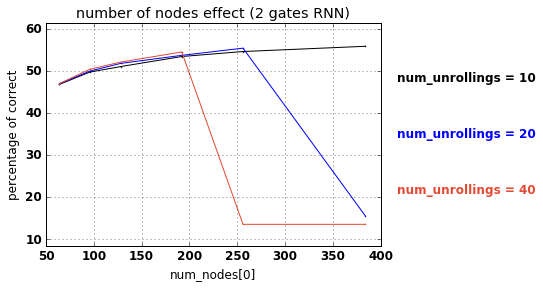

In [54]:
plot_data, _ = two_gates_plots.one_key_layout_data('two_gates_1',
                                                                'num_nodes[0]',
                                         "num_unrollings")
two_gates_plots.save_layout(plot_data[0],
                    'number of nodes effect (2 gates RNN)',
                    ['plots'],
                    'ns80000;decay_steps_30;ilr_1.;dc0.9')
two_gates_plots.draw(plot_data[0], 'number of nodes effect (2 gates RNN)')

In [55]:
iter_num = 10
results_GL = list()   
for i in range(iter_num):
    model = two_gates(64,
                             vocabulary,
                             characters_positions_in_vocabulary,
                             30,
                             1,
                             [128],
                             -1.,
                             train_text,
                             valid_text)
    model.simple_run(200,
                         'two_gates/variables/average#%s' % i,
                            20000,
                               4000,
                               5000,        #learning has a chance to be stopped after every block of steps
                               30,
                               0.9,
                               3,
                    fixed_num_steps=True)
    results_GL.extend(model._results)
    model.destroy()
    del model

Number of steps = 20000     Percentage = 13.74%     Time = 1171s     Learning rate = 0.0424
Number of steps = 20000     Percentage = 48.61%     Time = 1160s     Learning rate = 0.0424
Number of steps = 20000     Percentage = 48.94%     Time = 1174s     Learning rate = 0.0424
Number of steps = 20000     Percentage = 48.39%     Time = 1165s     Learning rate = 0.0424
Number of steps = 20000     Percentage = 48.96%     Time = 1167s     Learning rate = 0.0424
Number of steps = 20000     Percentage = 47.43%     Time = 1171s     Learning rate = 0.0424
Number of steps = 20000     Percentage = 48.97%     Time = 1169s     Learning rate = 0.0424
Number of steps = 20000     Percentage = 48.70%     Time = 1157s     Learning rate = 0.0424
Number of steps = 20000     Percentage = 49.18%     Time = 1174s     Learning rate = 0.0424
Number of steps = 20000     Percentage = 49.04%     Time = 1152s     Learning rate = 0.0424


In [56]:
folder_name = 'two_gates'
file_name = 'average%s_ns20k_dc0.9_hl667.pickle' % iter_num
force = True
pickle_dump = {'results_GL': results_GL}
if not os.path.exists(folder_name):
    try:
        os.makedirs(folder_name)
    except Exception as e:
        print("Unable create folder '%s'" % folder_name, ':', e)    
print('Pickling %s.' % (folder_name + '/' + file_name))
try:
    with open(folder_name + '/' + file_name, 'wb') as f:
        pickle.dump(pickle_dump, f, pickle.HIGHEST_PROTOCOL)
except Exception as e:
    print('Unable to save data to', file_name, ':', e)

Pickling two_gates/average10_ns20k_dc0.9_hl667.pickle.


In [ ]:
iter_num = 10
folder_name = 'two_gates'
pickle_file = 'average%s_ns20k_dc0.9_hl667.pickle' % num_iter

with open(folder_name + '/' + pickle_file, 'rb') as f:
  save = pickle.load(f)
  results_GL = save['results_GL']
  del save  # hint to help gc free up memory

In [58]:
average_indices = [1, 2, 3, 4, 6, 7, 8, 9]
average = 0
for idx in average_indices:
    average += results_GL[idx]['data']['train']['percentage'][-1]
average /= len(average_indices)

In [59]:
print(average)

48.8477213542


In [8]:
iter_num = 10
for i in range(iter_num):
    model = two_gates(64,
                                 vocabulary,
                                 characters_positions_in_vocabulary,
                                 30,
                                 1,
                                 [128],
                                 -1.,
                                 train_text,
                                 valid_text)
    text_list, gate_list = model.run_for_analitics(model.get_gates,
                                                            'two_gates/variables/average#%s' % i,
                                                            [1000, 75, None])
    structure_vocabulary_plots(text_list,
                                gate_list[0],
                                'gate for letter position',
                                'input gate',
                                ['two_gates', 'ns20000_hl667_dc0.9', 'average#%s' % i],
                                'vocabulary_structure_inputgate_average#%s' % i,
                                ylims = [0., 1.],
                                show=False)
    structure_vocabulary_plots(text_list,
                                gate_list[1],
                                'gate for letter position',
                                'forget gate',
                                ['two_gates', 'ns20000_hl667_dc0.9', 'average#%s' % i],
                                'vocabulary_structure_forgetgate_average#%s' % i,
                                ylims = [0., 1.],
                                show=False)
    for j in range(50):
        text_plot(text_list[j],
                    gate_list[0][j],
                    'input gate',
                    'input gate',
                    ['two_gates', 'ns20000_hl667_dc0.9', 'average#%s' % i, 'input_text_plots'],
                    '#%s' % j,
                    show=False)
        text_plot(text_list[j],
                    gate_list[1][j],
                    'forget gate',
                    'forget gate',
                    ['two_gates', 'ns20000_hl667_dc0.9', 'average#%s' % i, 'forget_text_plots'],
                    '#%s' % j,
                    show=False)
    model.destroy()
    del model
    gc.collect()

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [46]:
model = two_gates(64,
                            vocabulary,
                            characters_positions_in_vocabulary,
                            40,
                            1,
                            [64],
                          -1.,
                            train_text,
                            valid_text)
model_vars = ['self.Matrix',
              'self.Bias',
              'self.input_matrix',
              'self.input_bias',
              'self.forget_matrix',
              'self.forget_bias',
              'self.weights',
              'self.bias']
intermediate_vars = ['self.saved_sample_state[0]',
                     'self.saved_sample_state[1]',
                     'self.input_gate',
                     'self.forget_gate']
bad = model.run_for_analitics(model.get_insight,
                                                        'two_gates/variables/ns80000_numstairs30_dc0.9/nn64_nu40',
                                                        [model_vars, intermediate_vars, 75])

In [47]:
model = two_gates(64,
                            vocabulary,
                            characters_positions_in_vocabulary,
                            20,
                            1,
                            [64],
                          -1.,
                            train_text,
                            valid_text)
model_vars = ['self.Matrix',
              'self.Bias',
              'self.input_matrix',
              'self.input_bias',
              'self.forget_matrix',
              'self.forget_bias',
              'self.weights',
              'self.bias']
intermediate_vars = ['self.saved_sample_state[0]',
                     'self.saved_sample_state[1]',
                     'self.input_gate',
                     'self.forget_gate']
good = model.run_for_analitics(model.get_insight,
                                                        'two_gates/variables/ns80000_numstairs30_dc0.9/nn64_nu20',
                                                        [model_vars, intermediate_vars, 75])

self.input_gate:


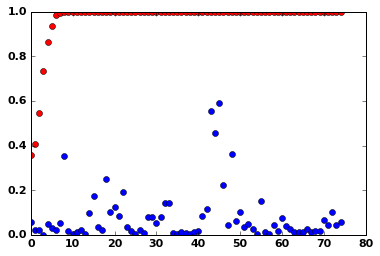

self.forget_gate:


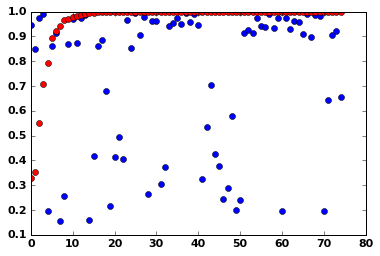

self.saved_sample_state[0]:


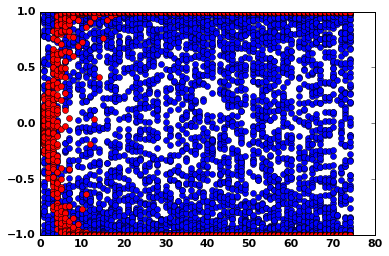

self.saved_sample_state[1]:


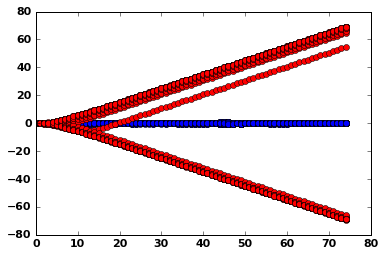

In [48]:
drift(good[1], bad[1])